In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(CellChat))
suppressMessages(library(foreach))

In [2]:
# future::plan("multisession", workers = 16) 

In [3]:
in_dir <- "../../results/04_spatial/10_viz_cell2location"
out_dir <- "../../results/04_spatial/25_cellchat"

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)
}

In [4]:
sample_list <- c('HC01', 'HC02', 'HC03', 'HC05', 
                 'SSc4994', 'SSc5380', 
               'SSc-HL01', 'SSc-HL05', 'SSc-HL06', 'SSc-HL11',
               'SSc-HL13', 'SSc-HL25', 'SSc-HL33', 'SSc-HL35')

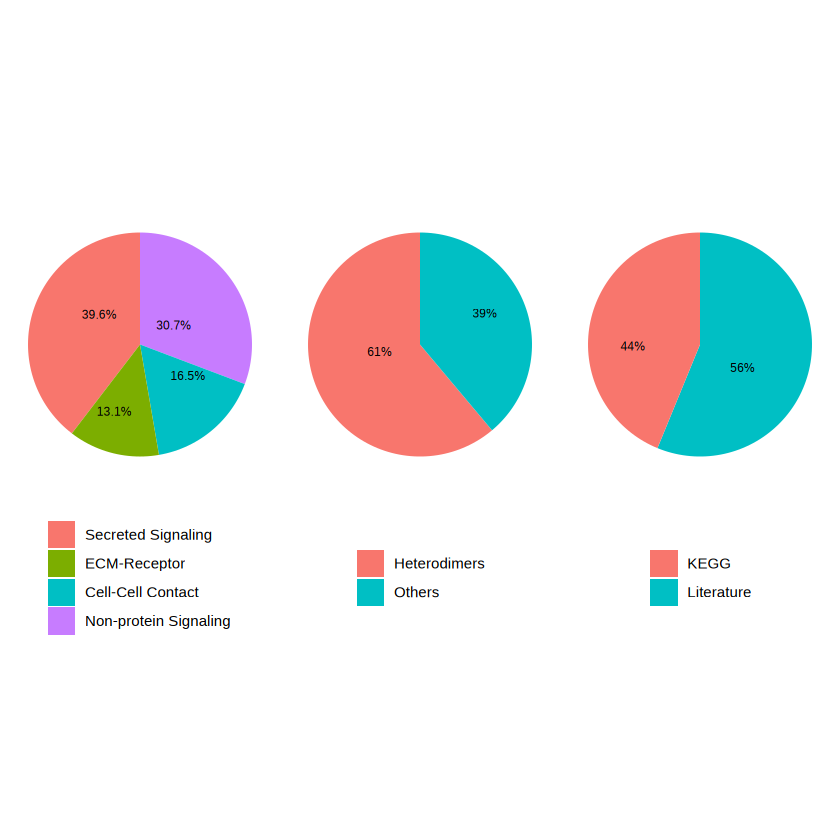

In [5]:
CellChatDB <- CellChatDB.human
showDatabaseCategory(CellChatDB)

In [6]:
# use all CellChatDB except for "Non-protein Signaling" for cell-cell communication analysis
CellChatDB.use <- subsetDB(CellChatDB)

In [7]:
length(unique(CellChatDB.use$interaction$pathway_name))

[1] 252

In [8]:
for(sample in sample_list) {
    cat(sample)
    cat('\n')

    obj <- readRDS(glue::glue("{in_dir}/{sample}.rds"))
    
    obj <- subset(obj, subset = pred_cell_type != 'Keratinocytes')
    
    # prepare data
    data.input = Seurat::GetAssayData(obj, layer = "data", assay = "Spatial")
    
    meta = data.frame(labels = obj$pred_cell_type, 
                      samples = sample, 
                      row.names = names(Seurat::Idents(obj)))
    
    meta$labels <- factor(meta$labels)
    
    spatial.locs = Seurat::GetTissueCoordinates(obj, scale = NULL, cols = c("imagerow", "imagecol"))
    
    spot.size = 65
    
    scalefactors = jsonlite::fromJSON(txt = glue::glue("../../data/spatial/{sample}/spatial/scalefactors_json.json"))
    conversion.factor = spot.size/scalefactors$spot_diameter_fullres
    spatial.factors <- data.frame(ratio = conversion.factor, tol = spot.size/2)
    
    cellchat <- CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels",
                               datatype = "spatial", 
                               coordinates = spatial.locs, 
                               spatial.factors = spatial.factors)
    
    cellchat@DB <- CellChatDB.use
    
    cellchat <- CellChat::subsetData(cellchat) # This step is necessary even if using the whole database
    
    cellchat <- CellChat::identifyOverExpressedGenes(cellchat)
    cellchat <- CellChat::identifyOverExpressedInteractions(cellchat, variable.both = F)
    
    cellchat <- CellChat::computeCommunProb(cellchat, type = "truncatedMean", trim = 0.1,
                              distance.use = TRUE, interaction.range = 250, scale.distance = 0.01,
                              contact.dependent = TRUE, contact.range = 100)
    
    cellchat <- CellChat::filterCommunication(cellchat, min.cells = 10)
    
    cellchat <- computeCommunProbPathway(cellchat)
    cellchat <- aggregateNet(cellchat)
    
    saveRDS(cellchat, glue::glue("{out_dir}/{sample}.rds"))

}

HC01


Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B cells, cDC, Endothelial, Fibroblasts, Langerhans cells, Macrophages, Melanocytes, Neural, pDC, Pericytes, Plasma cells, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2082 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:11:08.333845]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:14:02.392222]"
The cell-cell communication related with the followin

Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Endothelial, Fibroblasts, Monocytes, Neural, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 1665 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:14:07.714964]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:17:04.292867]"
The cell-cell communication related with the following cell groups are excluded due to the few number of cells:  Monocy

Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Macrophages, Neural, NK cells, Pericytes, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2013 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:17:11.399433]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:20:17.834231]"
The cell-cell communication related with the following cell groups are excluded due to the few number of cells:  cDC,

Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B cells, Endothelial, Fibroblasts, Neural, pDC, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2020 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:20:24.079535]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:23:56.321038]"
The cell-cell communication related with the following cell groups are excluded due to the few number of cells:  Neu

Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Macrophages, Mast cells, Melanocytes, Monocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2056 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:24:04.828342]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:27:44.403803]"
The cell-cell communication related with the following cell groups

Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Macrophages, Melanocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 1999 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:27:51.57754]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:30:48.667049]"
The cell-cell communication related with the following cell groups are excluded due to the

Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Endothelial, Fibroblasts, Macrophages, Melanocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 1963 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:30:53.59584]"


Warning message in min(d.spatial, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:31:40.304352]"
The cell-cell communication related with the following cell groups are excluded due to the few number of cells:  Endothelial, Macrophages, Melanocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells ! 	NA interactions are removed!
SSc-HL05


Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Macrophages, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2003 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:31:45.469451]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:35:42.185476]"
The cell-cell communication related with the following cell groups are excluded due to the few number 

Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Endothelial, Fibroblasts, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2074 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:35:47.012211]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:40:23.293009]"
The cell-cell communication related with the following cell groups are excluded due to the few number of cells:  Neural,

Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2021 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:40:28.228462]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:43:25.371867]"
The cell-cell communication related with the following cell groups are excluded due to the few number of cells:  cD

Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Melanocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 1890 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:43:30.176046]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:45:36.356546]"
The cell-cell communication related with the following cell groups are excluded due to the few number 

Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Macrophages, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2051 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:45:41.716234]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:49:56.118295]"
The cell-cell communication related with the following cell groups are excluded due to the few number 

Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Macrophages, Mast cells, Neural, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2059 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:50:01.830185]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:53:49.760017]"
The cell-cell communication related with the following cell groups are excluded due to the few numbe

Warning message:
“Not validating Seurat objects”


[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Macrophages, Melanocytes, Monocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 1998 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-08 01:53:56.760788]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-08 01:57:55.51561]"
The cell-cell communication related with the following cell groups are excluded